In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def load_model(path):
    model = Sequential()

    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
    model.add(BatchNormalization())

    model.add(Conv2D(32, (5, 5), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    model.add(Flatten())

    model.add(Dense(256, activation="relu"))
    model.add(Dense(36, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.load_weights(path)
    
    return model

def predict(model, image):
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image)
    image = cv2.resize(image, (28, 28))
    # plt.imshow(image)
    image = np.invert(image)
    # image=np.flipud(image)
    image = np.array(image) / 255.0
    image = np.reshape(image, (1, image.shape[0], image.shape[1], 1))
    prediction = model.predict(image)
    best_predictions = dict()
    
    for i in range(3):
        max_i = np.argmax(prediction[0])
        acc = round(prediction[0][max_i], 1)
        if acc > 0:
            label = labels[max_i]
            best_predictions[label] = acc
            prediction[0][max_i] = 0
        else:
            break
                
    return best_predictions
model = load_model("../models/best_val_loss_model.h5")

In [3]:
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys
 
# window class
class Window(QMainWindow):
    def __init__(self):
        super().__init__()
 
        # setting title
        self.setWindowTitle("Paint with PyQt5")
 
        # setting geometry to main window
        self.setGeometry(100,100,80,60)
 
        # creating image object
        self.image = QImage(self.size(), QImage.Format_RGB32)
 
        # making image color to white
        self.image.fill(Qt.white)
 
        # variables
        # drawing flag
        self.drawing = False
        # default brush size
        self.brushSize = 2
        # default color
        self.brushColor = Qt.black
 
        # QPoint object to tract the point
        self.lastPoint = QPoint()
 
        # creating menu bar
        mainMenu = self.menuBar()
 
        # creating file menu for save and clear action
        fileMenu = mainMenu.addMenu("File")
 
        # adding brush size to main menu
        b_size = mainMenu.addMenu("Brush Size")
 
        # adding brush color to ain menu
        b_color = mainMenu.addMenu("Brush Color")
 
        # creating save action
        saveAction = QAction("Save", self)
        # adding short cut for save action
        saveAction.setShortcut("Ctrl + S")
        # adding save to the file menu
        fileMenu.addAction(saveAction)
        # adding action to the save
        saveAction.triggered.connect(self.save)
 
        # creating clear action
        clearAction = QAction("Clear", self)
        # adding short cut to the clear action
        clearAction.setShortcut("Ctrl + C")
        # adding clear to the file menu
        fileMenu.addAction(clearAction)
        # adding action to the clear
        clearAction.triggered.connect(self.clear)
 
        # creating options for brush sizes
        # creating action for selecting pixel of 4px
        pix_4 = QAction("4px", self)
        # adding this action to the brush size
        b_size.addAction(pix_4)
        # adding method to this
        pix_4.triggered.connect(self.Pixel_4)
 
        # similarly repeating above steps for different sizes
        pix_7 = QAction("7px", self)
        b_size.addAction(pix_7)
        pix_7.triggered.connect(self.Pixel_7)
 
        pix_9 = QAction("9px", self)
        b_size.addAction(pix_9)
        pix_9.triggered.connect(self.Pixel_9)
 
        pix_12 = QAction("12px", self)
        b_size.addAction(pix_12)
        pix_12.triggered.connect(self.Pixel_12)
 
        # creating options for brush color
        # creating action for black color
        black = QAction("Black", self)
        # adding this action to the brush colors
        b_color.addAction(black)
        # adding methods to the black
        black.triggered.connect(self.blackColor)
 
        # similarly repeating above steps for different color
        white = QAction("White", self)
        b_color.addAction(white)
        white.triggered.connect(self.whiteColor)
 
        green = QAction("Green", self)
        b_color.addAction(green)
        green.triggered.connect(self.greenColor)
 
        yellow = QAction("Yellow", self)
        b_color.addAction(yellow)
        yellow.triggered.connect(self.yellowColor)
 
        red = QAction("Red", self)
        b_color.addAction(red)
        red.triggered.connect(self.redColor)
 
 
    # method for checking mouse cicks
    def mousePressEvent(self, event):
 
        # if left mouse button is pressed
        if event.button() == Qt.LeftButton:
            # make drawing flag true
            self.drawing = True
            # make last point to the point of cursor
            self.lastPoint = event.pos()
 
    # method for tracking mouse activity
    def mouseMoveEvent(self, event):
         
        # checking if left button is pressed and drawing flag is true
        if (event.buttons() & Qt.LeftButton) & self.drawing:
             
            # creating painter object
            painter = QPainter(self.image)
             
            # set the pen of the painter
            painter.setPen(QPen(self.brushColor, self.brushSize,
                            Qt.SolidLine, Qt.RoundCap, Qt.RoundJoin))
             
            # draw line from the last point of cursor to the current point
            # this will draw only one step
            painter.drawLine(self.lastPoint, event.pos())
             
            # change the last point
            self.lastPoint = event.pos()
            # update
            self.update()
 
    # method for mouse left button release
    def mouseReleaseEvent(self, event):
 
        if event.button() == Qt.LeftButton:
            # make drawing flag false
            self.drawing = False
 
    # paint event
    def paintEvent(self, event):
        # create a canvas
        canvasPainter = QPainter(self)
         
        # draw rectangle  on the canvas
        canvasPainter.drawImage(self.rect(), self.image, self.image.rect())
 
    # method for saving canvas
    def save(self):
        filePath, _ = QFileDialog.getSaveFileName(self, "Save Image", "",
                          "PNG(*.png);;JPEG(*.jpg *.jpeg);;All Files(*.*) ")
 
        if filePath == "":
            return
        self.image.save(filePath)
 
    # method for clearing every thing on canvas
    def clear(self):
        # make the whole canvas white
        self.image.fill(Qt.white)
        # update
        self.update()
 
    # methods for changing pixel sizes
    def Pixel_4(self):
        self.brushSize = 4
 
    def Pixel_7(self):
        self.brushSize = 7
 
    def Pixel_9(self):
        self.brushSize = 9
 
    def Pixel_12(self):
        self.brushSize = 12
 
    # methods for changing brush color
    def blackColor(self):
        self.brushColor = Qt.black
 
    def whiteColor(self):
        self.brushColor = Qt.white
 
    def greenColor(self):
        self.brushColor = Qt.green
 
    def yellowColor(self):
        self.brushColor = Qt.yellow
 
    def redColor(self):
        self.brushColor = Qt.red
 
 
 
# create pyqt5 app
App = QApplication(sys.argv)
 
# create the instance of our Window
window = Window()
 
# showing the window
window.show()
 
# start the app
sys.exit(App.exec())

: 

14400
1/1 [==============================] - 1s 783ms/step
{'T': 0.8, 'S': 0.1}


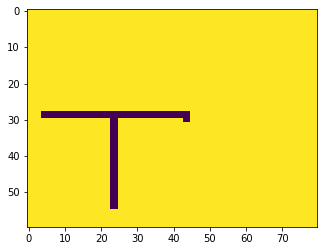

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = cv2.imread("C:/Users/Bella Babu/Downloads/test.png")
print(img.size)
best_predictions = predict(model, img)
print(best_predictions)



In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QMessageBox
from PyQt5.QtGui import QIcon
from PyQt5.QtCore import pyqtSlot

def window():
   d={"a":1,"b":2}
   app = QApplication(sys.argv)
   win = QWidget()
   button1 = QPushButton(win)
   button1.setText("Character Recognition ready")
   button1.move(50,50)
   button1.clicked.connect(showDialog)
   win.setWindowTitle("Click button")
   win.show()
   sys.exit(app.exec_())
	
def showDialog():
   res=""
   for i in best_predictions.keys():
    res+=i+":"+str(best_predictions[i])+"\n"
   msgBox = QMessageBox()
   msgBox.setIcon(QMessageBox.Information)
   msgBox.setText("BEST PREDICTIONS: \n"+res)
   msgBox.setWindowTitle("Answer")
   msgBox.setStandardButtons(QMessageBox.Ok | QMessageBox.Cancel)
   msgBox.buttonClicked.connect(msgButtonClick)

   returnValue = msgBox.exec()
   if returnValue == QMessageBox.Ok:
      print('OK clicked')
   
def msgButtonClick(i):
   print("Button clicked is:",i.text())
	
if __name__ == '__main__': 
   window()

KeyboardInterrupt: 

OK clicked


SystemExit: 0